# Plotting and modeling the data

df1 is the dataframe for the S&P500 index (against U.S. dollar) in the period 01.01.2021-17.02.2024, on a daily chart. df2 is the same dataframe for Bitcoin (against U.S. dollar)

In [895]:
import pandas as pd

df1 = pd.read_csv("USA500.IDXUSD_Candlestick_1_D_ASK_01.01.2021-17.02.2024.csv")
df1 = df1[df1['High']!=df1['Low']]
df1.set_index("Local time")
#df1 = df1.drop(df1.index[0])
df1

,Local time,Open,High,Low,Close,Volume
3,03.01.2021 23:00:00.000 GMT+0100,3759.661,3781.467,3661.601,3701.367,230.6245
4,04.01.2021 23:00:00.000 GMT+0100,3704.355,3739.664,3682.946,3724.758,199.3484
5,05.01.2021 23:00:00.000 GMT+0100,3726.858,3783.858,3694.467,3754.446,394.6232
6,06.01.2021 23:00:00.000 GMT+0100,3759.661,3812.649,3750.746,3805.946,159.3660
7,07.01.2021 23:00:00.000 GMT+0100,3805.267,3831.367,3783.701,3831.155,186.1918
...,...,...,...,...,...,...
1137,11.02.2024 23:00:00.000 GMT+0100,5024.754,5048.938,5015.313,5016.544,70.4987
1138,12.02.2024 23:00:00.000 GMT+0100,5016.729,5022.728,4920.524,4954.217,146.6876
1139,13.02.2024 23:00:00.000 GMT+0100,4957.153,5003.500,4951.517,5001.817,140.7311
1140,14.02.2024 23:00:00.000 GMT+0100,5002.269,5035.181,4996.181,5032.447,121.6669


In [896]:
df2 = pd.read_csv("BTCUSD_Candlestick_1_D_ASK_01.01.2021-17.02.2024.csv")
df2 = df2[df2['High']!=df2['Low']]
df2.set_index("Local time")
df2

,Local time,Open,High,Low,Close,Volume
1,01.01.2021 23:00:00.000 GMT+0100,29275,33352,29069,31732,3.2886
2,02.01.2021 23:00:00.000 GMT+0100,31743,34797,31484,33622,5.4939
3,03.01.2021 23:00:00.000 GMT+0100,33622,33693,27952,31066,5.7577
4,04.01.2021 23:00:00.000 GMT+0100,31066,34304,29976,33834,5.6623
5,05.01.2021 23:00:00.000 GMT+0100,33842,36561,33401,35968,5.4506
...,...,...,...,...,...,...
1139,13.02.2024 23:00:00.000 GMT+0100,49599,52095,49288,51809,5.6615
1140,14.02.2024 23:00:00.000 GMT+0100,51809,52883,51396,51403,2.6705
1141,15.02.2024 23:00:00.000 GMT+0100,51403,52621,51397,52048,5.8616
1142,16.02.2024 23:00:00.000 GMT+0100,52048,52324,50679,51838,0.2436


In [897]:
# here we just modify df2 so that it matches the number of data (or rows) for df2, as Bitcoin is traded more frequently than S&P500. 
for row in range(len(df1)):
    
    while (df1.index[row]!=df2.index[row]):
        
        df2 = df2.drop(df2.index[row])
        
df2 = df2.drop(df2.index[len(df1)])
df2 = df2.drop(df2.index[len(df1)])
df2

,Local time,Open,High,Low,Close,Volume
3,03.01.2021 23:00:00.000 GMT+0100,33622,33693,27952,31066,5.7577
4,04.01.2021 23:00:00.000 GMT+0100,31066,34304,29976,33834,5.6623
5,05.01.2021 23:00:00.000 GMT+0100,33842,36561,33401,35968,5.4506
6,06.01.2021 23:00:00.000 GMT+0100,35969,40423,35820,39767,6.1888
7,07.01.2021 23:00:00.000 GMT+0100,39766,42019,36636,40101,5.6250
...,...,...,...,...,...,...
1137,11.02.2024 23:00:00.000 GMT+0100,48165,50384,47752,49878,1.1769
1138,12.02.2024 23:00:00.000 GMT+0100,49878,50426,48372,49599,2.5744
1139,13.02.2024 23:00:00.000 GMT+0100,49599,52095,49288,51809,5.6615
1140,14.02.2024 23:00:00.000 GMT+0100,51809,52883,51396,51403,2.6705


Now, we will introduce two models: linear and parabolic. We will use the line and parabola formula and find the best fit for both when plotted on the data. Then, we will calculate their respective parameters and variances for each.

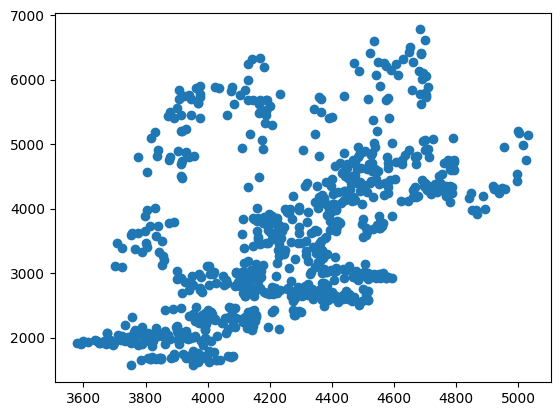

In [898]:
from scipy.optimize import curve_fit

def model_curve_f(x, a, b, c):
    return a*(x-b)**2 + c # parabola equation

def model_line_f(x, a, b):
    return a*x + b # linear equation

x_data = df1.Close
y_data = df2.Close/10
plt.scatter(x_data,y_data)

We use the curve_fit function in order to find optimal (or the ones that best fit) parameters for each curve (line and parabola). Parameters popt and pcov represent curve parameters and covariance matrixes.

In [899]:
popt1, pcov1 = curve_fit(model_curve_f, x_data, y_data, p0 = [2, 800, 3750])

In [900]:
popt2, pcov2 = curve_fit(model_line_f, x_data, y_data, p0 = [2, 0])

Here, we finally plot both the data and the parabola model.

In [901]:
import numpy as np
a_opt1, b_opt1, c_opt1 = popt1
a_opt2, b_opt2 = popt2
x_model = np.linspace(min(x_data), max(x_data), 100)
y_model1 = model_curve_f(x_model, a_opt1, b_opt1, c_opt1)
y_model2 = model_line_f(x_model, a_opt2, b_opt2)
x_data = df1.Close
y_data = df2.Close/10

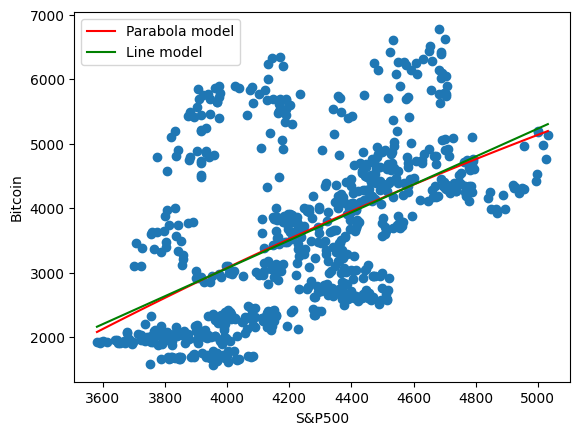

In [1010]:
plt.scatter(x_data,y_data)
plt.plot(x_model,y_model1, color='r', label='Parabola model')
plt.plot(x_model,y_model2, color='g', label='Line model')
plt.legend()
plt.xlabel('S&P500')
plt.ylabel('Bitcoin')  
plt.show()

In [903]:
popt1 # these are the parameters for the parabola model (a,b,c)

array([ 1.15459329e-04, -4.88610163e+03, -6.11157780e+03])

In [904]:
pcov1 # the diagonal elements of this matrix represent the varaince for the parameters.

array([[1.22661815e-07, 9.72411928e+00, 1.02644395e+01],
       [9.72411928e+00, 7.71166621e+08, 8.14310106e+08],
       [1.02644395e+01, 8.14310106e+08, 8.60177830e+08]])

In [905]:
popt2 # these are the parameters for the linear model (a,b)

array([ 2.11352701e+00, -5.44592890e+03])

In [906]:
pcov2 # the diagonal elements of this matrix represent the varaince for the parameters.

array([[ 1.48509076e-02, -6.30527397e+01],
       [-6.30527397e+01,  2.69108639e+05]])

# Rearranging the inital data for producing a different model

From the graph produced, we can see that there is a general trend, however there is a big dispersion of data. From the diagonal parameters in the covariance matrix, it is visible that the variance of the model is quite large. Therefore, S&P500 and Bitcoin don't have a clear relationship.

There is a case in world economy (probably one of many), where the two variables grow in opposite directions. One of those cases is the collapse of big banks. The event itself is usually bad news for general markets like the S&P500, as investors have less confidence in the economic growth. For Bitcoin, however, this is good news. There is a general rule of thumb that follows. As the traditional banking system is collapsing, people have less confidence in it. That is when they turn to cryptocurrency, as an alternative to that same system. Therefore the price grows, as the demand increases.

One of those cases happened in March 2023. The Silicon Valley bank has collapsed, which started a domino effect of collapsing of the big banks. What I have decided to do, is to extract all the email newsletters from 2023. Then I have analyzed text using nlp, and extracted the dates for those big bank collapses. The logic behind this is the following. By taking those dates out of the dataframes for Bitcoin and S&P500 (effectively eliminating that data), we would get a clearer picture. That is because the general trend would be more pronounced, as there would be less cases of the variables growing in opposite directions.

In [911]:
import spacy

In [912]:
nlp = spacy.load("en_core_web_sm")

In [943]:
with open("emails_content3.txt", 'r', encoding='utf-8') as f: # emails_content.txt is a file containing text from the email (it's one of few)
    text = f.read() # here we define our text

In [944]:
print(text)

How hip hop grew into a major business... <a href="http://www.morningbrew.com"><img src="https://link.morningbrew.com/img/62b63bd3ff8136015c0bece2j9ers.1o44j/d1da1cce.gif" alt="" border="0" /></a>



August 10, 2023 View Online <https://links.morningbrew.com/c/aw5?mbcid=32351752.2804707&mid=7cd3d7efcb2b5d1a6cbe0bf0931f4b2f> | Sign Up <https://links.morningbrew.com/c/6N-?kid=f2654ef3&mbcid=32351752.2804707&mid=7cd3d7efcb2b5d1a6cbe0bf0931f4b2f> |  Shop 10% Off <https://links.morningbrew.com/c/6NZ?mbcid=32351752.2804707&mid=7cd3d7efcb2b5d1a6cbe0bf0931f4b2f> 

Morning Brew <https://links.morningbrew.com/c/6N-?mbcid=32351752.2804707&mid=7cd3d7efcb2b5d1a6cbe0bf0931f4b2f>



Good morning. Many of you wrote in to “correct” our war movie trivia yesterday. You claimed that Forrest Gump was the highest-grossing movie that was set during the Vietnam War—not Platoon. And you know what? We will accept that answer.



As Mama said, you’ve got to put the past behind you before you can move on.



—Cas

In [945]:
print(len(text))

2325545


In [959]:
doc = nlp(text[1000000:2000000]) # we turn that text into nlp-readable object. Only a million characters are allowed to take, so
                                 # I have made several attempts in slicing it.

# Finding key words

Here, we are using a substantial element of SpaCy, which is breaking down sentences. For each sentence in a doc object, we check whether there is a word bank or failure used inside of it. If it is, we save its index into pattern_list list, which we will use later on

In [962]:
count = 0
sents = list(doc.sents)
pattern_list = []
for sent in doc.sents:
    if 'bank' in sent.text and 'failure' in sent.text:
        count+=1
        print(sent.text)
        
        for token in sent:
            # Check if the token is 'bank' or 'failure'
            if token.text.lower() in ['bank', 'failure']:
                # Print the token's text along with its index in the entire document
                print(f"Token: {token.text}, Index in doc: {token.i}")
                pattern_list.append(token.i)
                
pattern_list.sort()
print(count)
print(pattern_list)

All that growth happened in spite of climbing interest rates, inflation, recent bank failures, and a nerve-racking debt ceiling standoff that threatened to destroy the economy.




Token: bank, Index in doc: 67724
1
[67724]


# Finding dates

Here, we are extracting dates from the doc object in the following form: May 19, 2023. This is because that format indicates the beginning of a day article. We then add the index of those dates into a date_list list, which we will make us of later on.

In [963]:
import re

date_list = []

# regex pattern for dates
pattern = r'\b(?:January|February|March|April|May|June|July|August|September|October|November|December) [0-3]?[0-9], \d{4}\b'

# Iterate over sentences in the document
for ent in doc.ents:
    # Check if the sentence text matches the pattern
    if re.search(pattern, ent.text):
        for token in ent:
            print(token.i)
            date_list.append(token.i)
            break;
        print(ent.text)
        
print(date_list)


4307
June 26, 2023
7418
June 16, 2023
7507
May 15, 2023
11011
June 23, 2023
21412
June 20, 2023
24927
June 18, 2023
24975
June 11, 2023
27253
June 19, 1865
31625
June 15, 2023
34875
June 14, 2023
36018
June 13, 2023
41604
June 12, 2023
43674
December 8, 2022
48593
June 10, 2023
60355
June 15, 1215
60360
October 31, 1517
60365
December 16, 1773
60370
April 15, 1912
60375
August 28, 1963
60380
February 24, 2022
61446
March 30, 2023
66895
May 9, 2023
66985
May 15, 2023
71603
September 25, 2022
80700
May 28, 2023
80753
May 26, 2018
82880
May 23, 2021 For
90191
June 30, 2023
92060
May 23, 2023
95404
May 22, 2010
96442
May 21, 2023
98704
May 20, 2023
101292
May 19, 2023
104697
May 18, 2023
107985
May 17, 2023
111089
May 16, 2023
114573
May 15, 2023
117892
May 14, 2023 <
119557
September 20, 2014
122543
July 9, 2023
[4307, 7418, 7507, 11011, 21412, 24927, 24975, 27253, 31625, 34875, 36018, 41604, 43674, 48593, 60355, 60360, 60365, 60370, 60375, 60380, 61446, 66895, 66985, 71603, 80700, 80753,

# Finding the final dates

Now that we have all the dates, as well as the locations of the keywords, we can match those keywords to the dates at which they were mentioned in. We check whether the index in the pattern_list is positioned in-between two consecutive dates. If that is the case, we add the index of the initial date into the final_list list.

After that we create the log_dates function that creates a csv file that contains all of those dates. We then call that function later on where we log those details in.

It's important to know that I have run this program several times in order to log those dates into that csv file, as there were multiple text documents, as well as multiple slices of those same documents (because of the maximum capability of the doc object). Therefore, bear in mind that by running this program again, the csv document might change.

In [964]:
final_list = []
for el1 in pattern_list:
    
    for i in range(len(date_list) - 1):
        
        if el1>date_list[i] and el1<date_list[i+1]:
            
            final_list.append(date_list[i])
            break;
final_list = list(set(final_list))
final_list.sort()
print(final_list)

[66985]


In [965]:
import os
import csv
def log_dates(date):
    filename = 'final_dates.csv'
    file_exists = os.path.isfile(filename)

    with open(filename, 'a', newline='') as csvfile:
        fieldnames = ['dates']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        
        if not file_exists:
            writer.writeheader()
        
        writer.writerow({
            'dates': date
        })

In [966]:
final_date_list = []

for el in final_list:
    k = (f"{doc[el].text} " + f"{doc[el+1].text}" + f"{doc[el+2].text}" + f" {doc[el+3].text}") # this accounts for the date and the comma.
    k = str(k)
    final_date_list.append(k)
    log_dates(k)

print(final_date_list)

['May 15, 2023']


In [968]:
from datetime import datetime
dates = pd.read_csv("final_dates.csv")



for i in range(7):
    date_obj = datetime.strptime(dates.dates[i], '%B %d, %Y')
    formatted_date_str = date_obj.strftime('%d.%m.%Y')
    dates.dates[i] = formatted_date_str + ' '
    #print(row)
dates

,dates
0,09.07.2023
1,20.04.2023
2,18.03.2023
3,16.03.2023
4,14.03.2023
5,12.03.2023
6,15.05.2023


In [969]:
# we change the date format into a standardised date format 
regex_pattern = r'\d{2}:\d{2}:\d{2}\.\d{3}\sGMT[+-]\d{4}'

# Assuming df1 is your DataFrame and 'Local time' is the column you want to modify
df1['Local time'] = df1['Local time'].str.replace(regex_pattern, "", regex=True)
df1.reset_index(drop=True, inplace=True)
df1

,Local time,Open,High,Low,Close,Volume
0,03.01.2021,3759.661,3781.467,3661.601,3701.367,230.6245
1,04.01.2021,3704.355,3739.664,3682.946,3724.758,199.3484
2,05.01.2021,3726.858,3783.858,3694.467,3754.446,394.6232
3,06.01.2021,3759.661,3812.649,3750.746,3805.946,159.3660
4,07.01.2021,3805.267,3831.367,3783.701,3831.155,186.1918
...,...,...,...,...,...,...
803,11.02.2024,5024.754,5048.938,5015.313,5016.544,70.4987
804,12.02.2024,5016.729,5022.728,4920.524,4954.217,146.6876
805,13.02.2024,4957.153,5003.500,4951.517,5001.817,140.7311
806,14.02.2024,5002.269,5035.181,4996.181,5032.447,121.6669


In the following lines of code, the dates from the table are removed from our initial dataframes df1 and df2. We also remove the following 20 dates from the table as well, as that accounts for the heat present in the economic system due to bank collapses.

In [997]:
l2 = df1['Local time'].tolist()
l1 = dates.dates.tolist()

for el1 in l1:
    
    for el2 in l2:
        
        if (el1 == el2):
    
            for i in range(20):
                if (l2.index(el2) + i) in df1.index:
                    df1.drop(index = l2.index(el2) + i, inplace = True)
                else:
                    continue
                print(l2.index(el2))


In [998]:
df1

,Local time,Open,High,Low,Close,Volume
0,03.01.2021,3759.661,3781.467,3661.601,3701.367,230.6245
1,04.01.2021,3704.355,3739.664,3682.946,3724.758,199.3484
2,05.01.2021,3726.858,3783.858,3694.467,3754.446,394.6232
3,06.01.2021,3759.661,3812.649,3750.746,3805.946,159.3660
4,07.01.2021,3805.267,3831.367,3783.701,3831.155,186.1918
...,...,...,...,...,...,...
803,11.02.2024,5024.754,5048.938,5015.313,5016.544,70.4987
804,12.02.2024,5016.729,5022.728,4920.524,4954.217,146.6876
805,13.02.2024,4957.153,5003.500,4951.517,5001.817,140.7311
806,14.02.2024,5002.269,5035.181,4996.181,5032.447,121.6669


In [999]:
regex_pattern = r'\d{2}:\d{2}:\d{2}\.\d{3}\sGMT[+-]\d{4}'

# Assuming df1 is your DataFrame and 'Local time' is the column you want to modify
df2['Local time'] = df2['Local time'].str.replace(regex_pattern, "", regex=True)
df2.reset_index(drop=True, inplace=True)
df2

,Local time,Open,High,Low,Close,Volume
0,03.01.2021,33622,33693,27952,31066,5.7577
1,04.01.2021,31066,34304,29976,33834,5.6623
2,05.01.2021,33842,36561,33401,35968,5.4506
3,06.01.2021,35969,40423,35820,39767,6.1888
4,07.01.2021,39766,42019,36636,40101,5.6250
...,...,...,...,...,...,...
722,11.02.2024,48165,50384,47752,49878,1.1769
723,12.02.2024,49878,50426,48372,49599,2.5744
724,13.02.2024,49599,52095,49288,51809,5.6615
725,14.02.2024,51809,52883,51396,51403,2.6705


In [1000]:
l2 = df2['Local time'].tolist()
l1 = dates.dates.tolist()

for el1 in l1:
    
    for el2 in l2:
        
        if (el1 == el2):
    
            for i in range(20):
                if (l2.index(el2) + i) in df2.index:
                    df2.drop(index = l2.index(el2) + i, inplace = True)
                else:
                    continue
                print(l2.index(el2))


In [1001]:
df2

,Local time,Open,High,Low,Close,Volume
0,03.01.2021,33622,33693,27952,31066,5.7577
1,04.01.2021,31066,34304,29976,33834,5.6623
2,05.01.2021,33842,36561,33401,35968,5.4506
3,06.01.2021,35969,40423,35820,39767,6.1888
4,07.01.2021,39766,42019,36636,40101,5.6250
...,...,...,...,...,...,...
722,11.02.2024,48165,50384,47752,49878,1.1769
723,12.02.2024,49878,50426,48372,49599,2.5744
724,13.02.2024,49599,52095,49288,51809,5.6615
725,14.02.2024,51809,52883,51396,51403,2.6705


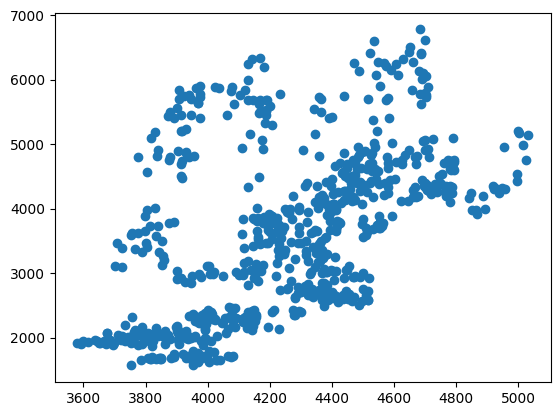

In [1002]:
import matplotlib.pyplot as plt
x_data = df1.Close
y_data = df2.Close/10
plt.plot(x_data, y_data, 'o')

In [1003]:
from scipy.optimize import curve_fit

def model_curve_f(x, a, b, c):
    return a*(x-b)**2 + c

def model_line_f(x, a, b):
    return a*x + b

In [1004]:
popt2, pcov2 = curve_fit(model_line_f, x_data, y_data, p0 = [2, 2100])
popt1, pcov1 = curve_fit(model_curve_f, x_data, y_data, p0 = [2, 800, 3750])

In [1005]:
import numpy as np
a_opt1, b_opt1, c_opt1 = popt1
a_opt2, b_opt2 = popt2
x_model = np.linspace(min(x_data), max(x_data), 100)
y_model1 = model_curve_f(x_model, a_opt1, b_opt1, c_opt1)
y_model2 = model_line_f(x_model, a_opt2, b_opt2)

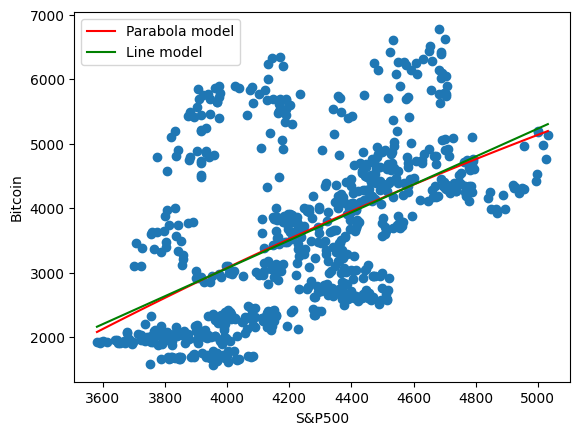

In [1011]:
plt.scatter(x_data,y_data)
plt.plot(x_model,y_model1, color='r', label='Parabola model')
plt.plot(x_model,y_model2, color='g', label='Line model')
plt.legend()
plt.xlabel('S&P500')
plt.ylabel('Bitcoin')
plt.show()

In [1007]:
pcov2

array([[ 1.63376819e-02, -6.94187202e+01],
       [-6.94187202e+01,  2.96601002e+05]])

In [1008]:
pcov1

array([[1.34181310e-07, 2.97572349e+00, 3.20888389e+00],
       [2.97572349e+00, 6.60759970e+07, 7.13449817e+07],
       [3.20888389e+00, 7.13449817e+07, 7.71359779e+07]])

# Results

The expected result was that the covariance for both models would be decreased, as we removed the data that doesn't fit our model.

The covariance for the linear model (we look a the diagonal elements) was slightly increased, however for the parabola model they were decreased significantly. The a parameter didn't change, however the b, and c parameters were decresed by one order of magnitude. This is to be expected, as b and c determine the x and y intercepts, and a is just the growth rate of the function.